In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math

## Esercizio 1

1.4 Massa di probabilità di X (poissoniana) con lambda = 0.9

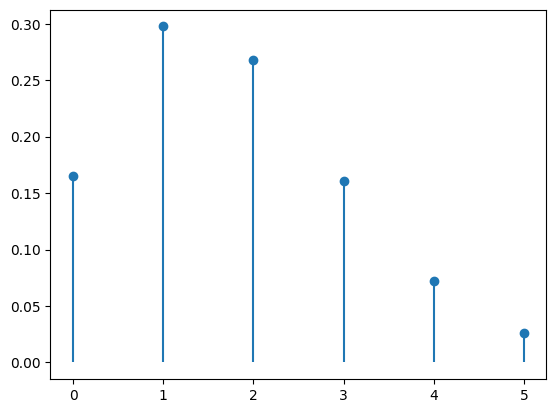

In [5]:
Z = st.poisson(2*0.9)
x = np.arange(0, Z.ppf(0.99))
y = Z.pmf(x)
plt.vlines(x,0,y)
plt.plot(x,y,'o')
plt.show()

## Esercizio 3

In [4]:
rilevazioni = pd.read_csv('rilevazioni.csv', sep = ';')
rilevazioni

,temperatura,blocchidanneggiati,raffreddamento
0,46.024489,0.0,1.0
1,83.225486,0.0,1.0
2,81.451565,0.0,NaN
3,54.427135,0.0,1.0
4,76.438674,0.0,1.0
...,...,...,...
1722,28.688900,5.0,0.0
1723,56.358840,5.0,0.0
1724,64.711851,6.0,0.0
1725,34.016859,6.0,0.0


3.1

In [12]:
print(f'Numero casi totali: {len(rilevazioni)}')
print(f'Numero casi contenenti un valore mancante: {len(rilevazioni)-len(rilevazioni.dropna())}')

cont = 0
for attributo in rilevazioni.columns:
    print(f'Attributo {attributo} contiene {rilevazioni[attributo].isna().sum()} valori mancanti')


Numero casi totali: 1727
Numero casi contenenti un valore mancante: 5
Attributo temperatura contiene 0 valori mancanti
Attributo blocchidanneggiati contiene 0 valori mancanti
Attributo raffreddamento contiene 5 valori mancanti


3.2 
La rappresentazione più appropriata è un diagramma a barre in quanto abbiamo valori numerici con solo due possibili valori.

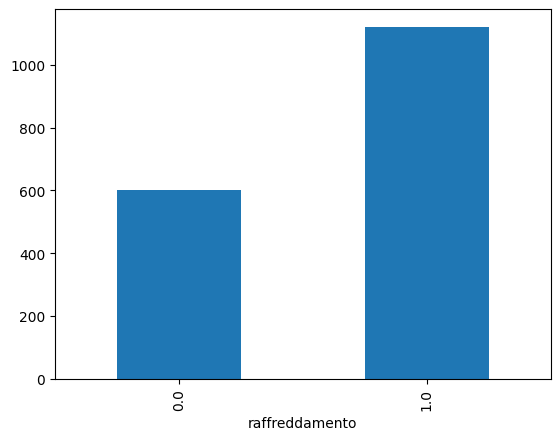

In [14]:
rilevazioni.raffreddamento.value_counts().sort_index().plot.bar()
plt.show()

3.3 
Per valutare l'ipotesi che esista una relazione tra i due attributi, possiamo costruire lo scatter plot dei due attributi e commentarlo.

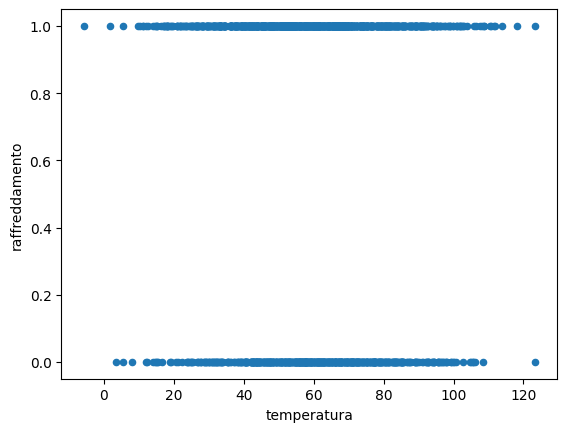

-0.04621947336116281

In [17]:
rilevazioni.plot.scatter('temperatura', 'raffreddamento')
plt.show()
print('Lo scatter plot mostra come non esista alcun tipo di relazione tra i due attributi, per cui dobbiamo confutare l ipotesi.')
rilevazioni.temperatura.corr(rilevazioni.raffreddamento)
print('Inoltre, l indice di correlazione lineare prossimo a 0 conferma tale ipotesi.')

3.4
blocchidanneggiati è un attributo di tipo quantitativo discreto, per cui la rappresentazione grafica più appropriata è un grafico a barre

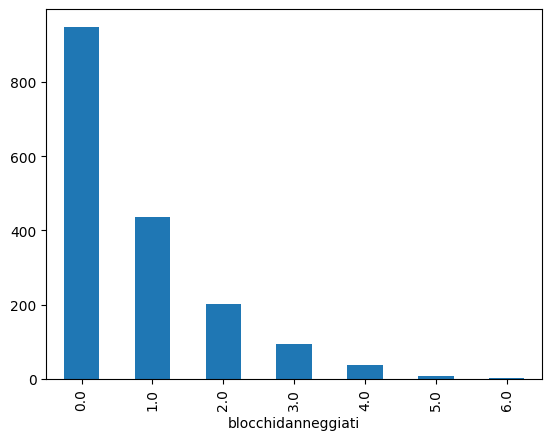

L andamento del grafico ricorda quello della massa di probabilità di una distribuzione geometrica


In [19]:
rilevazioni.blocchidanneggiati.value_counts().plot.bar()
plt.show()
print('L andamento del grafico ricorda quello della massa di probabilità di una distribuzione geometrica')

3.5

In [26]:
blocchi_raffr = pd.crosstab(index = rilevazioni['blocchidanneggiati'],
                            columns= rilevazioni['raffreddamento'])

blocchi_raffr

R = len(rilevazioni[rilevazioni['raffreddamento'] == 1])
D = len(rilevazioni[rilevazioni['blocchidanneggiati'] > 0])

print(f'P(D) = {D/len(rilevazioni)}')
print(f'P(R and D) = {}')

P(D) = 0.4504921829762594


## Esercizio 4

4.1

In [31]:
raffreddamento_si = rilevazioni[rilevazioni['raffreddamento'] == 1].blocchidanneggiati
raffreddamento_no = rilevazioni[rilevazioni['raffreddamento'] == 0].blocchidanneggiati

4.2

In [34]:
def decili(series):
    for i in range (0,11):
        print(f'Decile {i} : {series.quantile(i/10)}\n')

decili(raffreddamento_no)
decili(raffreddamento_si)



Decile 0 : 0.0

Decile 1 : 0.0

Decile 2 : 1.0

Decile 3 : 1.0

Decile 4 : 1.0

Decile 5 : 2.0

Decile 6 : 2.0

Decile 7 : 2.0

Decile 8 : 3.0

Decile 9 : 3.0

Decile 10 : 6.0

Decile 0 : 0.0

Decile 1 : 0.0

Decile 2 : 0.0

Decile 3 : 0.0

Decile 4 : 0.0

Decile 5 : 0.0

Decile 6 : 0.0

Decile 7 : 0.0

Decile 8 : 1.0

Decile 9 : 1.0

Decile 10 : 3.0



4.3

In [35]:
raffreddamento_si.mean()

0.2994652406417112

4.4

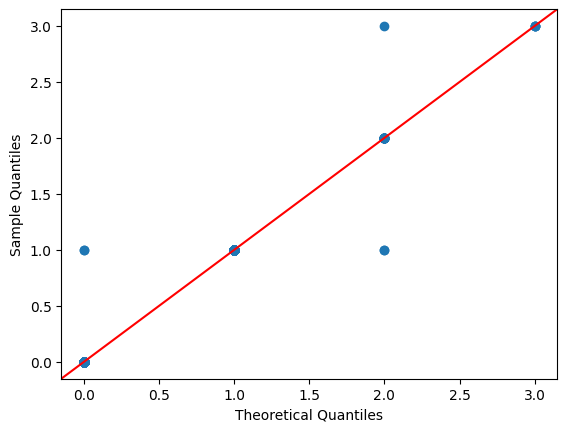

Il qqplot ci permette di confrontare due campioni per valutare che essi seguano la stessa distribuzione. Come si può vedere, i punti ottenuti si adagiano bene sulla bisettrice di 45 gradi, escludendo eventuali outlier. Per cui possiamo validare l ipotesi che raffreddamento_si segua una distribuzione di Poisson.
(0.2994652406417112, 0.29739489664976365) inoltre i valori di varianza e valore atteso molto simili confermano tale ipotesi.s


In [39]:
sm.qqplot(raffreddamento_si, dist = st.poisson(raffreddamento_si.mean()), line = '45')
plt.show()
print('Il qqplot ci permette di confrontare due campioni per valutare che essi seguano la stessa distribuzione. Come si può vedere, i punti ottenuti si adagiano bene sulla bisettrice di 45 gradi, escludendo eventuali outlier. Per cui possiamo validare l ipotesi che raffreddamento_si segua una distribuzione di Poisson.')
print(f'{raffreddamento_si.mean(), raffreddamento_si.var() } inoltre i valori di varianza e valore atteso molto simili confermano tale ipotesi.')

4.5

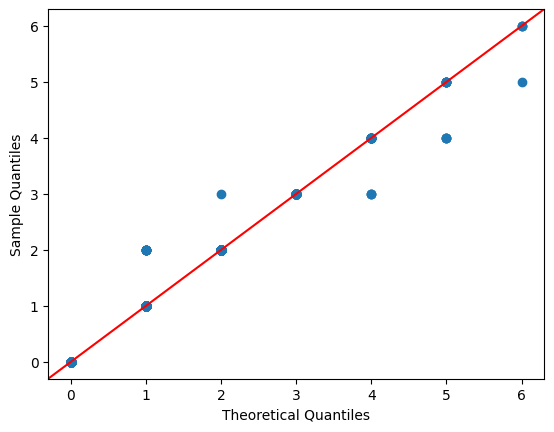

Come si può vedere, anche qui i punti ottenuti si adagiano bene sulla bisettrice di 45 gradi, escludendo eventuali outlier. Per cui possiamo validare l ipotesi che raffreddamento_no segua una distribuzione di Poisson.
(1.6433333333333333, 1.5453644963828603) inoltre i valori di varianza e valore atteso molto simili confermano tale ipotesi.


In [40]:
sm.qqplot(raffreddamento_no, dist = st.poisson(raffreddamento_no.mean()), line = '45')
plt.show()
print('Come si può vedere, qui i punti ottenuti non si adagiano bene sulla bisettrice di 45 gradi. Per cui possiamo confutare l ipotesi che raffreddamento_no segua una distribuzione di Poisson.')
print(f'{raffreddamento_no.mean(), raffreddamento_no.var() } inoltre i valori di varianza e valore atteso piuttosto diversi confermano tale ipotesi.')

4.6

In [41]:
print(f'Stimatore per la varianza di Xsi: media campionaria = {raffreddamento_si.mean()}')
print(f'Stimatore per la varianza di Xsi: radice quadrata della media campionaria = {math.sqrt(raffreddamento_si.mean())}')
print(f'Stimatore per il parametro lambda di Xsi: media campionaria = {raffreddamento_si.mean()}')



Stimatore per la varianza di Xsi: media campionaria = 0.2994652406417112
Stimatore per la varianza di Xsi: radice quadrata della media campionaria = 0.547234173495873
Stimatore per il parametro lambda di Xsi: media campionaria = 0.2994652406417112


4.7

In [44]:
z = st.norm(0,1)
n = math.sqrt(len(raffreddamento_si))*0.1
1-(2*z.cdf(n/raffreddamento_si.std())-1)

8.134484197341862e-10

4.8

In [46]:
rilevazioni.raffreddamento.mean()

0.6515679442508711

4.9

In [47]:
xsi = st.poisson(raffreddamento_si.mean())
xno = st.poisson(raffreddamento_no.mean())

print(f'P(xsi > 4) = {1-xsi.cdf(4)}')
print(f'P(xno > 4) = {1-xno.cdf(4)}')

P(xsi > 4) = 1.565177694551334e-05
P(xno > 4) = 0.02614944042142986


In [48]:
print(f'P(allarme) = {(1-xsi.cdf(4))+(1-xno.cdf(4))}')

P(allarme) = 0.026165092198375373
